In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
df = pd.read_csv('../data/Titanic.csv')  
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


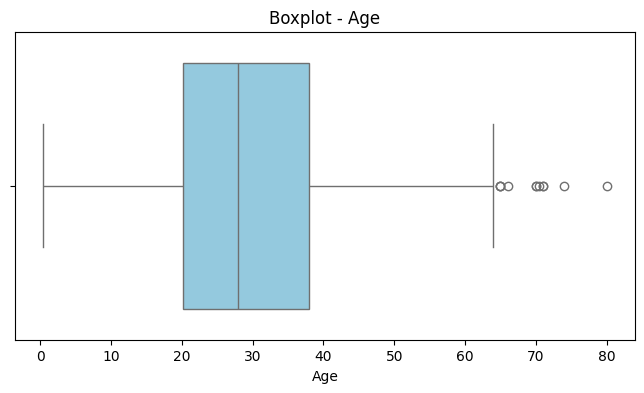

In [3]:
# Age
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'], color='skyblue')
plt.title("Boxplot - Age")
plt.savefig('../visuals/boxplot_age.png')
plt.show()

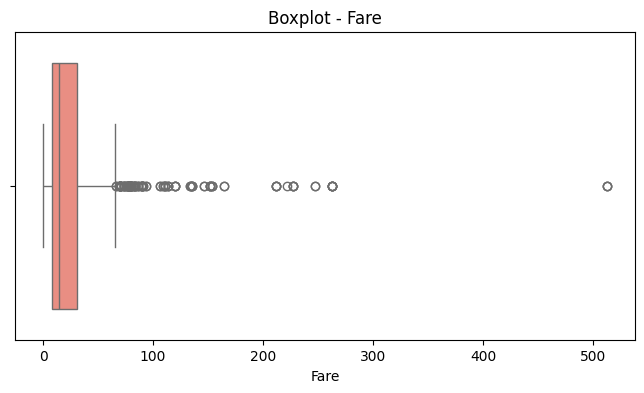

In [4]:
# Fare
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Fare'], color='salmon')
plt.title("Boxplot - Fare")
plt.savefig('../visuals/boxplot_fare.png')
plt.show()

In [5]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

outliers_age, lower_age, upper_age = detect_outliers_iqr(df, 'Age')
outliers_fare, lower_fare, upper_fare = detect_outliers_iqr(df, 'Fare')

print(f"Number of Age outliers: {outliers_age.shape[0]}")
print(f"Number of Fare outliers: {outliers_fare.shape[0]}")


Number of Age outliers: 11
Number of Fare outliers: 116


In [6]:
# Z-score method for Fare
z_scores = np.abs(stats.zscore(df[['Fare', 'Age']].dropna()))
outlier_zscore = (z_scores > 3)

# Count rows with any high Z-score in Fare or Age
outlier_rows = np.where(outlier_zscore.any(axis=1))[0]
print(f"Z-score based outliers (Fare or Age): {len(outlier_rows)}")


Z-score based outliers (Fare or Age): 20
